<center>

# R5.A.11 - Projet final
# Comparaison entre K-Means et DBSCAN

---

</center>

## 0. Imports


In [2]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons


## 1. **Algorithme K-Means**

#### 1.1. Introduction
K-Means est un algorithme de **clustering partitionnel** très populaire qui tente de regrouper des points de données en un nombre pré-défini de $ K $ clusters. Chaque point est affecté au cluster dont le centre est le plus proche, calculé comme la moyenne des points du cluster.

#### 1.2. Formulation mathématique
L'objectif de K-Means est de minimiser la somme des distances au carré entre chaque point de données et le centre du cluster auquel il appartient. Cela peut être formalisé comme suit :

Soit $X = \{ x_1, x_2, ..., x_n \}$ l'ensemble de $n$ points de données dans un espace $d$-dimensionnel. On cherche à diviser $X$ en $K$ clusters $C_1, C_2, ..., C_K$, en minimisant la fonction de coût :

$$
J = \sum_{k=1}^{K} \sum_{x_i \in C_k} || x_i - \mu_k ||^2
$$

où :
- $\mu_k$ est le centre (ou centroïde) du cluster $C_k$,
- $|| x_i - \mu_k ||$ est la distance euclidienne entre le point $x_i$ et le centre $\mu_k$.

L'algorithme suit ces étapes :
1. Initialisation : Choisir $K$ centres de clusters de façon aléatoire.
2. Affectation : Assigner chaque point au centre de cluster le plus proche.
3. Mise à jour : Recalculer les centres des clusters en prenant la moyenne des points assignés à chaque cluster.
4. Répéter les étapes 2 et 3 jusqu'à ce que les centres des clusters convergent (changent peu ou pas).

#### 1.3. Exemples

Nous allons utiliser **Scikit-Learn** pour implémenter l'algorithme K-Means et visualiser les résultats.

##### 1.3.1. *Exemples où K-Means est performant*

K-Means fonctionne bien lorsque les clusters sont bien séparés, de forme convexe (généralement circulaire ou elliptique), et qu'il n'y a pas trop de bruit ou d'outliers.

*Exemple 1 : Clusters sphériques bien séparés*

Dans cet exemple, les données sont générées à partir de distributions gaussiennes distinctes. Les clusters sont bien séparés et de forme sphérique.


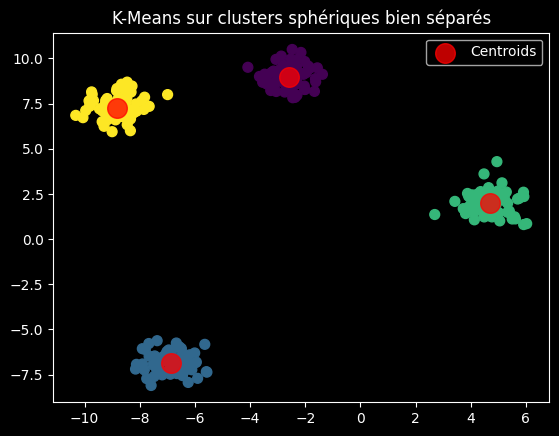

In [4]:
# Génération de données avec clusters sphériques bien séparés
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Application de K-Means
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

# Visualisation des résultats
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c="red",
    alpha=0.75,
    label="Centroids",
)
plt.title("K-Means sur clusters sphériques bien séparés")
plt.legend()
plt.show()


**Analyse :**  
Dans ce cas, K-Means fonctionne très bien car les clusters sont bien séparés et de forme sphérique. Les centres des clusters sont bien identifiés et l'algorithme converge rapidement.

*Exemple 2 : Clusters elliptiques bien séparés*

K-Means peut aussi bien fonctionner lorsque les clusters sont de forme elliptique et qu'ils ne se chevauchent pas trop.


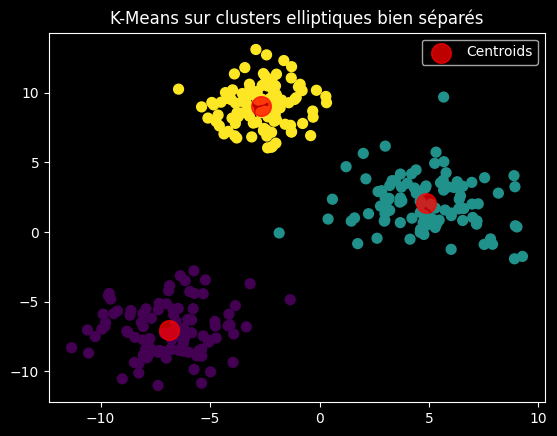

In [3]:
# Génération de données elliptiques
X, _ = make_blobs(
    n_samples=300, centers=3, cluster_std=[1.5, 2.0, 1.8], random_state=42
)

# Application de K-Means
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# Visualisation des résultats
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c="red",
    alpha=0.75,
    label="Centroids",
)
plt.title("K-Means sur clusters elliptiques bien séparés")
plt.legend()
plt.show()


**Analyse :**  
Bien que les clusters soient de forme elliptique, K-Means fonctionne toujours bien car ils sont suffisamment séparés, permettant ainsi à l'algorithme de capturer correctement la distribution des données.

##### 1.3.2. *Exemples où K-Means n'est pas performant*

K-Means échoue dans les cas où les clusters ont des formes complexes, où les données contiennent beaucoup d'outliers ou du bruit, ou lorsque les clusters ne sont pas bien séparés.

*Exemple 3 : Données en forme de croissant ("moons")*

Les clusters non convexes, comme ceux en forme de croissant, posent problème à K-Means, car il est basé sur une distance euclidienne et cherche à former des clusters sphériques.


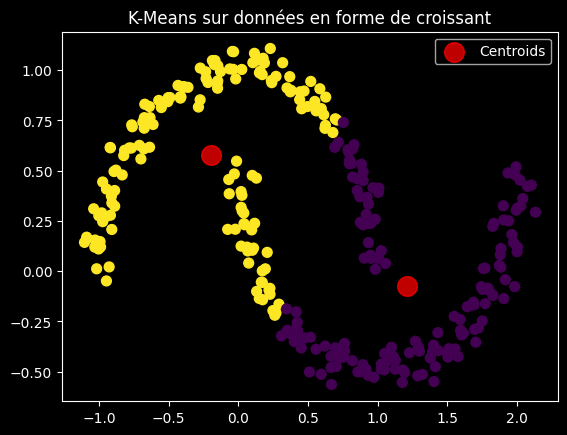

In [4]:
# Génération de données en forme de croissant
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Application de K-Means
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)

# Visualisation des résultats
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c="red",
    alpha=0.75,
    label="Centroids",
)
plt.title("K-Means sur données en forme de croissant")
plt.legend()
plt.show()


**Analyse :**  
Ici, K-Means échoue à capturer la structure des données, car les clusters ont une forme en croissant. Les centres des clusters sont mal positionnés et l'algorithme tend à regrouper les points en deux ensembles circulaires, ce qui n'est pas correct.

*Exemple 4 : Clusters de densité différente*

K-Means ne gère pas bien les clusters avec des densités très différentes, car il cherche des clusters de taille similaire. Voici un exemple avec des clusters de différentes densités.

> Note : Il peut être nécéssaire de run plusieurs fois cette cellule pour observer la détéction de 2 centroides dans le même cluster.


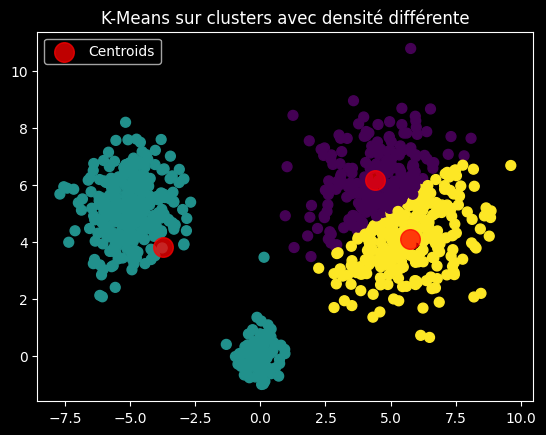

In [10]:
# Génération de données avec des clusters de densité différente
X, _ = make_blobs(
    n_samples=[100, 500, 300],
    centers=[[0, 0], [5, 5], [-5, 5]],
    cluster_std=[0.5, 1.5, 1.0],
    random_state=42,
)

# Application de K-Means
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# Visualisation des résultats
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c="red",
    alpha=0.75,
    label="Centroids",
)
plt.title("K-Means sur clusters avec densité différente")
plt.legend()
plt.show()


**Analyse :**  
Dans cet exemple, K-Means ne parvient pas à capturer les différentes densités des clusters. Il tend à regrouper les clusters de manière égale en taille, ce qui n'est pas souhaitable lorsque les densités varient.

*Exemple 5 : Données avec bruit (outliers)*

K-Means est très sensible aux outliers et au bruit, car chaque point influence le calcul des centroïdes.



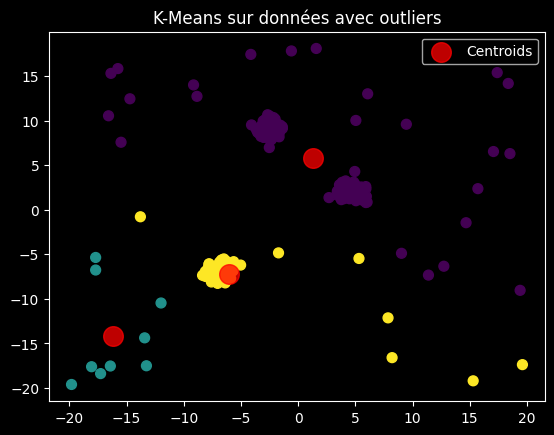

In [45]:
# Génération de données avec outliers
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Ajout d'outliers
X = np.concatenate([X, np.random.uniform(low=-20, high=20, size=(40, 2))])

# Application de K-Means
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# Visualisation des résultats
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c="red",
    alpha=0.75,
    label="Centroids",
)
plt.title("K-Means sur données avec outliers")
plt.legend()
plt.show()


**Analyse :**  
Les outliers perturbent K-Means, car les centres des clusters sont déplacés par les points extrêmes. L'algorithme n'est pas robuste face à des données bruitées, et cela dégrade la qualité du clustering.

#### 1.4. Analyse de la complexité
La complexité de K-Means dépend du nombre de points $n$, du nombre de clusters $k$, de la dimension des données $d$, et du nombre d'itérations $i$ que l'algorithme effectue. En général, la complexité temporelle est donnée par :

$$
O(n \times k \times d \times i)
$$

Cela signifie que, pour chaque itération, l'algorithme doit recalculer les distances de chaque point par rapport aux centres des clusters et ensuite recalculer les centres des clusters.

##### Visualisation de la complexité

Nous allons illustrer comment le temps de calcul évolue en fonction du nombre de points de données. Voici un exemple avec un graphique qui montre la complexité en temps pour différents nombres de points de données :



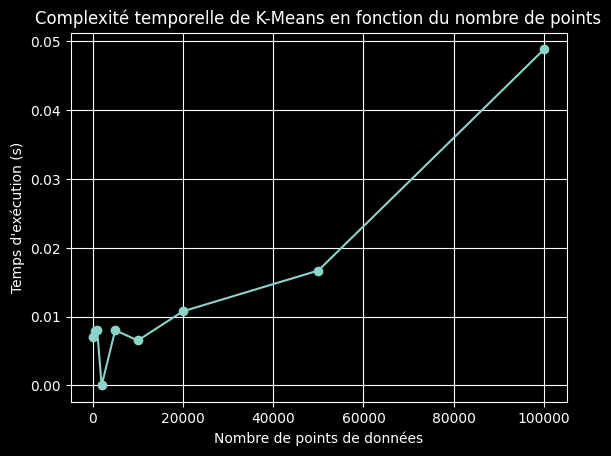

In [28]:
# Fonction pour évaluer le temps d'exécution de K-Means
def evaluate_kmeans_complexity(n_samples_list):
    times = []
    for n_samples in n_samples_list:
        X, _ = make_blobs(
            n_samples=n_samples, centers=4, cluster_std=0.60, random_state=42
        )
        kmeans = KMeans(n_clusters=4)
        start_time = time.time()
        kmeans.fit(X)
        times.append(time.time() - start_time)
    return times


# Différentes tailles de jeu de données
n_samples_list = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]

# Évaluation du temps d'exécution
times = evaluate_kmeans_complexity(n_samples_list)

# Visualisation des résultats
plt.plot(n_samples_list, times, marker="o")
plt.xlabel("Nombre de points de données")
plt.ylabel("Temps d'exécution (s)")
plt.title("Complexité temporelle de K-Means en fonction du nombre de points")
plt.grid(True)
plt.show()


**Analyse du graphique** :  
Ce graphique montre que le temps de calcul de K-Means augmente presque linéairement avec le nombre de points de données, ce qui est en accord avec la complexité $O(n)$. Plus le nombre de points est élevé, plus le temps nécessaire pour converger vers une solution augmente.  
Cependant, on peut également noter qu'en relancant l'algorithme plusieurs fois, on peut obtenir des résultats différents en dessous de 20 000 points.

#### 1.5. Limites de K-Means
- Sensible aux **outliers** et au **bruit**.
- Le nombre de clusters $K$ doit être spécifié à l'avance.
- Ne fonctionne bien que pour des clusters de forme **circulaire** ou **elliptique**.



---

### 2. **Algorithme DBSCAN**

#### 2.1. Introduction
DBSCAN (**Density-Based Spatial Clustering of Applications with Noise**) est un algorithme de clustering qui regroupe les points de données denses et identifie les outliers (points de bruit). Contrairement à K-Means, DBSCAN ne nécessite pas de spécifier le nombre de clusters à l'avance.

#### 2.2. Concept de base
L'algorithme repose sur deux paramètres :
- $\varepsilon$ : une distance seuil qui définit le rayon d'influence d'un point.
- MinPts : le nombre minimum de points dans un voisinage de rayon $\varepsilon$ pour qu'un point soit considéré comme un point de **noyau**.

Les étapes principales sont les suivantes :
1. Choisir un point non visité et récupérer ses voisins dans un rayon $\varepsilon$.
2. Si ce point contient suffisamment de voisins (≥ MinPts), il est considéré comme un point de noyau, et un cluster est créé.
3. Répéter le processus pour chaque point non visité.
4. Les points qui ne satisfont pas ces conditions sont considérés comme du **bruit**.

#### 2.3. Formulation mathématique
Pour chaque point $p$, on définit son voisinage $N(p, \varepsilon)$ comme l'ensemble des points dans un rayon $\varepsilon$ de $p$. Un point est un **point de noyau** s'il possède au moins $\text{MinPts}$ points dans son voisinage.

#### 2.4. Exemples

Nous allons utiliser **Scikit-Learn** pour implémenter l'algorithme DBSCAN et visualiser les résultats.

##### 2.4.1. *Exemples où DBSCAN est performant*

DBSCAN est performant dans des situations où les clusters ont des formes arbitraires, où il y a du bruit, et où les densités des clusters peuvent varier. Il est particulièrement utile lorsqu'on ne connaît pas le nombre de clusters à l'avance.

*Exemple 1 : Données en forme de croissant ("moons")*

DBSCAN excelle dans les cas où les clusters ont des formes non convexes. Un bon exemple est celui des données en forme de croissant, où K-Means échoue mais DBSCAN performe bien.


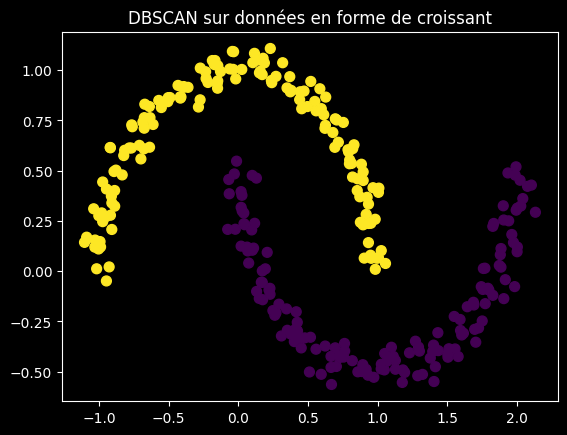

In [6]:
# Génération de données en forme de croissant
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Application de DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Visualisation des résultats
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap="viridis")
plt.title("DBSCAN sur données en forme de croissant")
plt.show()


**Analyse :**  
DBSCAN réussit à identifier correctement les deux clusters en forme de croissant, contrairement à K-Means. Il ne suppose pas que les clusters doivent être sphériques, ce qui lui permet de capturer des structures complexes.

*Exemple 2 : Clusters avec bruit et outliers*

DBSCAN est conçu pour gérer les outliers et le bruit dans les données. Voici un exemple où les données contiennent des points aléatoires en dehors des clusters.


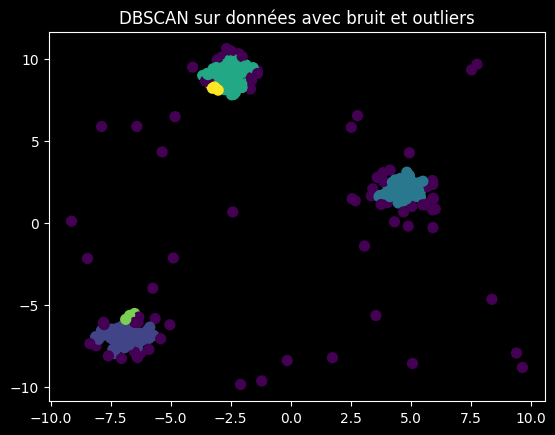

In [30]:
# Génération de données avec bruit et outliers
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Ajout de bruit (outliers)
X = np.concatenate([X, np.random.uniform(low=-10, high=10, size=(30, 2))])

# Application de DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Visualisation des résultats
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap="viridis")
plt.title("DBSCAN sur données avec bruit et outliers")
plt.show()


**Analyse :**  
DBSCAN marque les outliers comme des points "non attribués" (label = -1) et ne les affecte à aucun cluster. Cette capacité à gérer le bruit permet à DBSCAN de fonctionner de manière plus robuste que K-Means dans des environnements bruyants.

*Exemple 3 : Clusters de densités différentes*

Contrairement à K-Means, DBSCAN peut gérer des clusters ayant des densités différentes sans problème. Il ne fait aucune hypothèse sur la taille ou la forme des clusters.


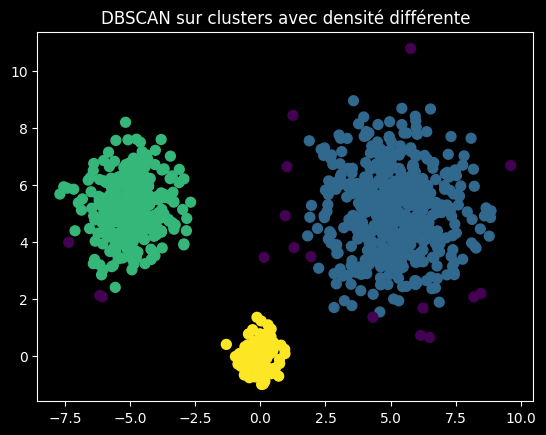

In [56]:
# Génération de données avec des clusters de densité différente
X, _ = make_blobs(
    n_samples=[100, 500, 300],
    centers=[[0, 0], [5, 5], [-5, 5]],
    cluster_std=[0.5, 1.5, 1.0],
    random_state=42,
)

# Application de DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Visualisation des résultats
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap="viridis")
plt.title("DBSCAN sur clusters avec densité différente")
plt.show()


**Analyse :**  
DBSCAN parvient à identifier correctement les clusters même s'ils ont des densités différentes. Cela montre l'avantage de cet algorithme par rapport à K-Means, qui ne peut pas gérer de telles variations de densité sans ajustement.

##### 2.4.2. *Exemples où DBSCAN n'est pas performant*

DBSCAN présente certaines limites. Il ne fonctionne pas bien dans les situations où la densité des clusters est similaire à celle du bruit ou lorsque les clusters sont très proches les uns des autres avec des densités similaires.

*Exemple 4 : Clusters bien séparés mais proches de la densité du bruit*

DBSCAN peut échouer lorsque les clusters ont une densité proche de celle du bruit ou lorsque le paramètre $\varepsilon$ est mal ajusté.



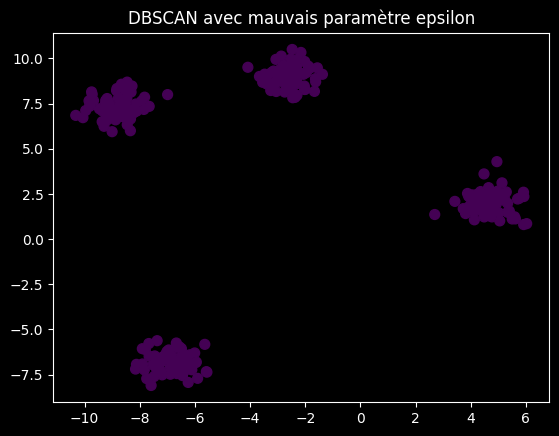

In [64]:
# Génération de données avec des clusters denses
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Application de DBSCAN avec un mauvais paramètre epsilon
dbscan = DBSCAN(eps=0.1, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Visualisation des résultats
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap="viridis")
plt.title("DBSCAN avec mauvais paramètre epsilon")
plt.show()


**Analyse :**  
Si $\varepsilon$ est mal choisi, DBSCAN peut classer presque tous les points comme des outliers, échouant à former des clusters significatifs. L'algorithme est sensible au paramètre $\varepsilon$, et une mauvaise sélection de ce paramètre peut entraîner des résultats insatisfaisants.

*Exemple 5 : Données très denses avec des clusters proches*

DBSCAN échoue également lorsque les clusters sont très proches les uns des autres ou lorsque la densité est très élevée, car il peut les fusionner en un seul cluster.


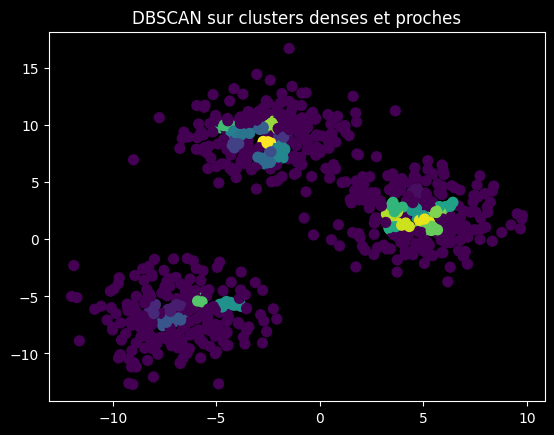

In [84]:
# Génération de données avec des clusters denses et proches
X, _ = make_blobs(n_samples=800, centers=3, cluster_std=2, random_state=42)

# Application de DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Visualisation des résultats
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap="viridis")
plt.title("DBSCAN sur clusters denses et proches")
plt.show()


**Analyse :**  
Dans ce cas, DBSCAN fusionne plusieurs clusters proches en un seul, car il ne fait pas de distinction claire entre les clusters lorsque ceux-ci sont très proches et de densité similaire. Cela montre que DBSCAN a du mal à gérer des clusters denses et proches les uns des autres.

#### 2.5. Analyse de la complexité
La complexité de DBSCAN est principalement déterminée par le calcul des voisinages de chaque point (recherche des points dans un rayon $\varepsilon$). La complexité est donc :

$$
O(n \log n)
$$

dans le cas où une structure de données efficace comme un arbre KD est utilisée pour accélérer la recherche des voisins. Cependant, dans le pire des cas, la complexité peut atteindre $O(n^2)$ lorsque tous les points sont voisins, car chaque point est comparé à tous les autres.

##### Visualisation de la complexité
Nous allons illustrer comment le temps de calcul de DBSCAN évolue en fonction du nombre de points de données, tout comme nous l'avons fait pour K-Means.


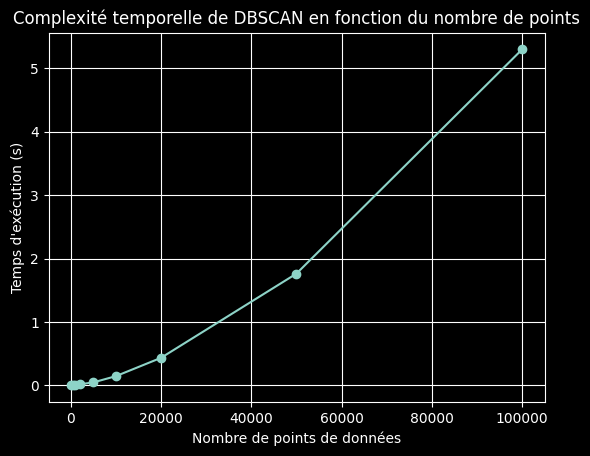

In [31]:
# Fonction pour évaluer le temps d'exécution de DBSCAN
def evaluate_dbscan_complexity(n_samples_list):
    times = []
    for n_samples in n_samples_list:
        X, _ = make_blobs(
            n_samples=n_samples, centers=4, cluster_std=0.60, random_state=42
        )
        dbscan = DBSCAN(eps=0.3, min_samples=5)
        start_time = time.time()
        dbscan.fit(X)
        times.append(time.time() - start_time)
    return times


# Différentes tailles de jeu de données
n_samples_list = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]

# Évaluation du temps d'exécution
times = evaluate_dbscan_complexity(n_samples_list)

# Visualisation des résultats
plt.plot(n_samples_list, times, marker="o")
plt.xlabel("Nombre de points de données")
plt.ylabel("Temps d'exécution (s)")
plt.title("Complexité temporelle de DBSCAN en fonction du nombre de points")
plt.grid(True)
plt.show()


**Analyse du graphique** :  
Comme prévu, le temps de calcul de DBSCAN augmente de manière quasi-linéaire avec le nombre de points de données lorsque $\varepsilon$ et MinPts sont bien choisis. Cependant, dans les cas où les données sont très denses ou peu séparées, le temps de calcul peut augmenter de manière plus drastique, ce qui serait représenté par une légère courbure sur le graphique.

#### 2.6. Avantages de DBSCAN
- Ne nécessite pas de spécifier le nombre de clusters à l'avance.
- Peut identifier des clusters de **forme arbitraire**.
- Gère bien le **bruit** et les **outliers**.



---

### 3. **Comparaison K-Means vs DBSCAN**

Après avoir exploré plusieurs exemples pour K-Means et DBSCAN, il est clair que ces deux algorithmes de clustering ont des avantages et des inconvénients distincts. Nous allons maintenant approfondir leur comparaison à travers des scénarios spécifiques.

#### 3.1. Comparaison théorique

| Caractéristique                 | **K-Means**                                  | **DBSCAN**                                       |
|---------------------------------|----------------------------------------------|--------------------------------------------------|
| **Type d'algorithme**           | Partitionnement                              | Basé sur la densité                              |
| **Nombre de clusters**          | Doit être spécifié à l'avance $K$            | Automatique, dépend des paramètres $\varepsilon$ et MinPts |
| **Forme des clusters**          | Fonctionne bien pour des clusters sphériques | Peut capturer des clusters de formes arbitraires |
| **Sensibilité au bruit**        | Sensible aux outliers                        | Robuste face aux outliers et au bruit            |
| **Gestion des clusters de densité différente** | Mauvais                       | Bon, peut gérer différentes densités             |
| **Complexité temporelle**       | $O(n \times k \times d \times i)$            | $O(n \log n)$ (dans le meilleur des cas)         |
| **Robustesse aux choix de paramètres** | Paramètre $K$ à choisir               | Paramètres $\varepsilon$ et MinPts sensibles     |
| **Convergence**                 | Peut converger vers un minimum local         | Stable, ne nécessite pas de convergence          |
| **Interprétabilité des résultats** | Centroides clairs et simples à visualiser | Moins interprétable (pas de "centroïdes")        |

#### 3.2. Points forts de chacuns

**Points forts de K-Means**
- **Efficacité** : K-Means est plus rapide que DBSCAN sur de grands ensembles de données.
- **Simplicité** : Plus facile à comprendre et à implémenter.

**Points forts de DBSCAN**
- **Flexibilité** : Peut détecter des clusters de formes complexes (non sphériques).
- **Robustesse** : Gère bien les outliers et ne nécessite pas de connaître le nombre de clusters à l'avance.

#### 3.3. Comparaison pratique à travers différents exemples

*Exemple 1 : Clusters sphériques bien séparés (Performance K-Means)*

Sur des données de clusters sphériques bien séparés, K-Means montre des performances optimales. DBSCAN fonctionne également bien dans ce contexte, mais K-Means peut être plus rapide car il n'a pas besoin de calculer des voisinages complexes.


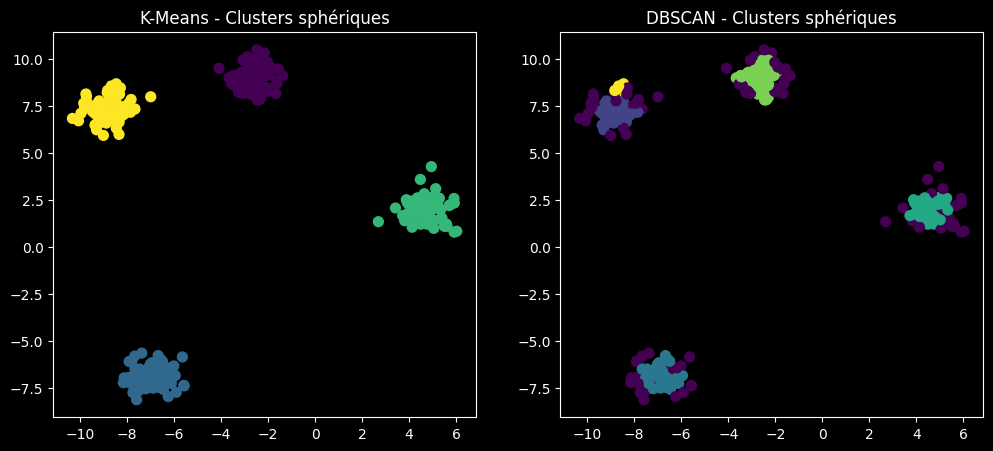

In [86]:
# Génération de données avec clusters sphériques bien séparés
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Application de K-Means
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

# Application de DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Visualisation des résultats
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.title("K-Means - Clusters sphériques")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap="viridis")
plt.title("DBSCAN - Clusters sphériques")

plt.show()


**Analyse** :  
- **K-Means** : Parfaitement adapté, très rapide à converger.
- **DBSCAN** : Fonctionne aussi, mais la performance peut être légèrement moins efficace si les clusters sont bien séparés mais proches de la densité du bruit.

*Exemple 2 : Données en forme de croissant ("moons") (Performance DBSCAN)*

Dans des cas où les clusters ont des formes non convexes comme des croissants, K-Means échoue complètement à capturer les structures des clusters, alors que DBSCAN excelle dans ces situations.


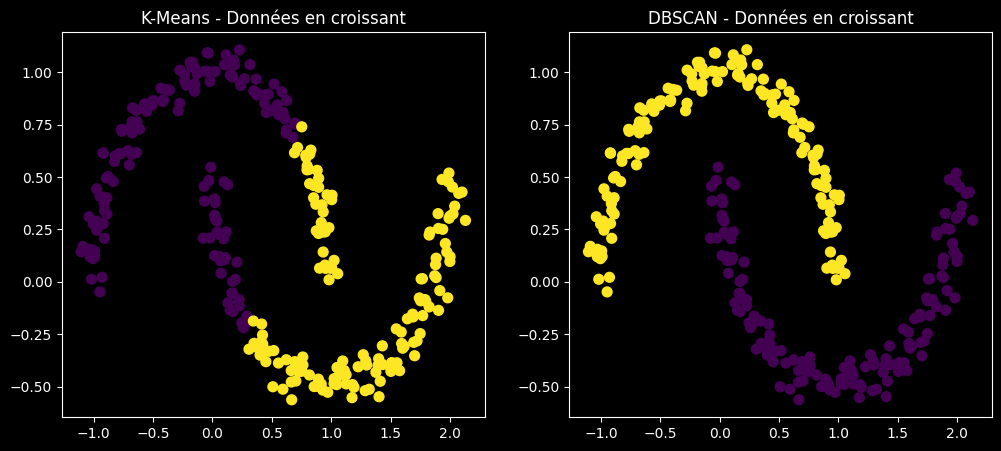

In [87]:
# Génération de données en forme de croissant
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Application de K-Means
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)

# Application de DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Visualisation des résultats
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.title("K-Means - Données en croissant")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap="viridis")
plt.title("DBSCAN - Données en croissant")

plt.show()


**Analyse** :  
- **K-Means** : L'échec est évident. Les clusters sont forcés en deux régions circulaires, alors que la vraie structure en croissant est perdue.
- **DBSCAN** : DBSCAN identifie correctement la forme des clusters grâce à sa capacité à capturer des clusters de formes arbitraires.

*Exemple 3 : Clusters avec bruit (Outliers)*

Lorsque les données contiennent du bruit ou des outliers, DBSCAN s'en sort bien en identifiant les points bruités et en ne les affectant à aucun cluster. K-Means, en revanche, est sensible à ces points et peut déplacer les centroïdes en fonction d'eux.


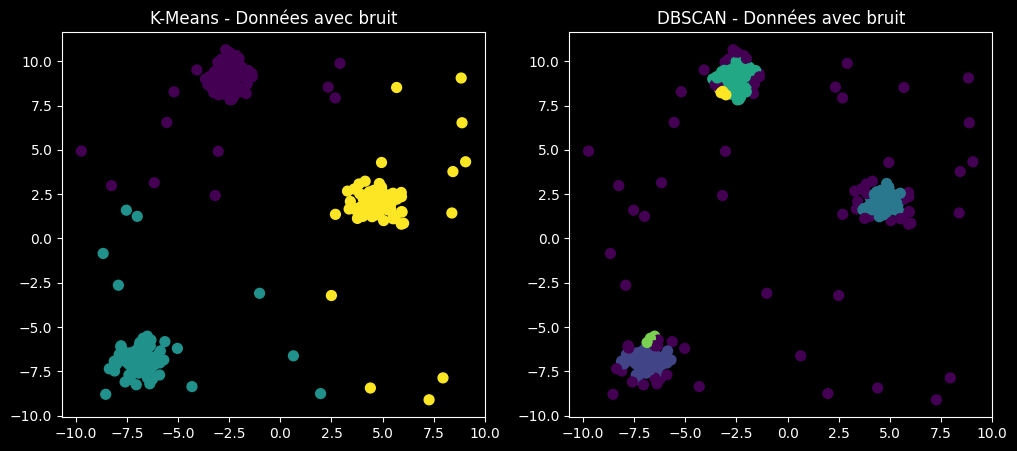

In [88]:
# Génération de données avec bruit et outliers
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Ajout de bruit
X = np.concatenate([X, np.random.uniform(low=-10, high=10, size=(30, 2))])

# Application de K-Means
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# Application de DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Visualisation des résultats
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.title("K-Means - Données avec bruit")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap="viridis")
plt.title("DBSCAN - Données avec bruit")

plt.show()


**Analyse** :  
- **K-Means** : Les outliers influencent les centres des clusters, ce qui entraîne un mauvais positionnement des centroïdes et des affectations incorrectes.
- **DBSCAN** : Les points bruités sont identifiés comme des outliers (label = -1) et ne perturbent pas les clusters principaux.

*Exemple 4 : Clusters de densité différente*

Lorsque les clusters ont des densités différentes, K-Means échoue à identifier correctement les clusters, tandis que DBSCAN réussit à s'adapter à ces variations de densité.


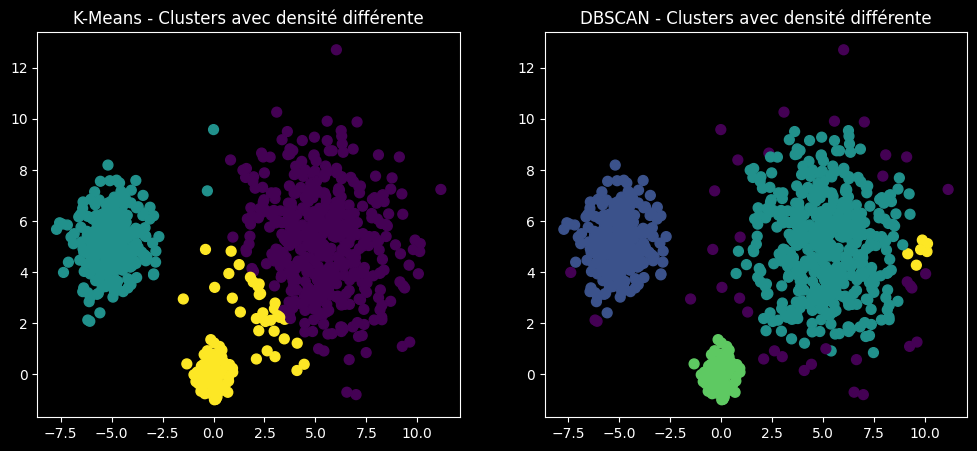

In [167]:
# Génération de données avec des clusters de densité différente
X, _ = make_blobs(
    n_samples=[100, 500, 300],
    centers=[[0, 0], [5, 5], [-5, 5]],
    cluster_std=[0.5, 2, 1.0],
    random_state=42,
)

# Application de K-Means
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# Application de DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Visualisation des résultats
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap="viridis")
plt.title("K-Means - Clusters avec densité différente")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap="viridis")
plt.title("DBSCAN - Clusters avec densité différente")

plt.show()


**Analyse** :  
- **K-Means** : L'algorithme force les clusters à être de taille similaire, même si les densités sont différentes, ce qui donne des résultats sous-optimaux.
- **DBSCAN** : L'algorithme s'adapte naturellement aux différences de densité, séparant correctement les clusters en fonction de leur densité locale.

#### 3.4. Comparaison des complexités

##### Complexité K-Means

La complexité de K-Means est $O(n \times k \times d \times i)$, où :
- $n$ est le nombre de points,
- $k$ est le nombre de clusters,
- $d$ est la dimension des données,
- $i$ est le nombre d'itérations.

K-Means est relativement rapide, mais la convergence vers un minimum local peut nécessiter plusieurs itérations, surtout si les centres initiaux sont mal choisis.

##### Complexité DBSCAN

La complexité de DBSCAN dépend de la méthode de recherche des $\varepsilon$-voisins :
- $O(n \log n)$ si une structure de recherche efficace est utilisée (comme un arbre KD),
- $O(n^2)$ dans le pire des cas (si tous les points sont voisins).

DBSCAN peut être plus coûteux que K-Means dans certains cas, mais il peut éviter plusieurs itérations car il ne cherche pas à converger vers un centre de cluster.

##### Visualisation des temps de calcul

Nous allons maintenant comparer graphiquement le temps d'exécution de K-Means et DBSCAN pour différentes tailles de jeu de données.


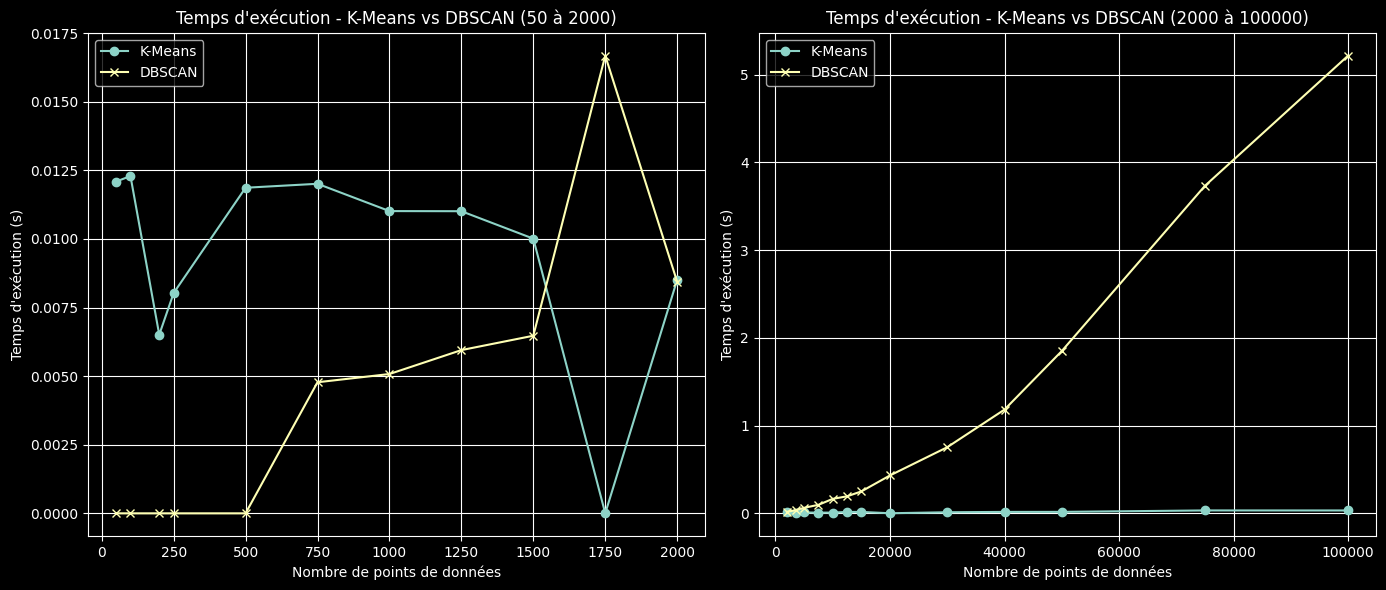

In [34]:
# Evaluation des temps de calcul pour K-Means et DBSCAN
n_samples_list_small = [50, 100, 200, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
n_samples_list_big = [2000, 3500, 5000, 7500, 10000, 12500, 15000, 20000, 30000, 40000, 50000, 75000, 100000]

kmeans_times_small = []
dbscan_times_small = []
kmeans_times_big = []
dbscan_times_big = []

# Calcul des temps pour les petites valeurs
for n_samples in n_samples_list_small:
    X, _ = make_blobs(n_samples=n_samples, centers=4, cluster_std=0.60, random_state=42)

    # Temps de calcul pour K-Means
    start_time = time.time()
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X)
    kmeans_times_small.append(time.time() - start_time)

    # Temps de calcul pour DBSCAN
    start_time = time.time()
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan.fit(X)
    dbscan_times_small.append(time.time() - start_time)

# Calcul des temps pour les grandes valeurs
for n_samples in n_samples_list_big:
    X, _ = make_blobs(n_samples=n_samples, centers=4, cluster_std=0.60, random_state=42)

    # Temps de calcul pour K-Means
    start_time = time.time()
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X)
    kmeans_times_big.append(time.time() - start_time)

    # Temps de calcul pour DBSCAN
    start_time = time.time()
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan.fit(X)
    dbscan_times_big.append(time.time() - start_time)

# Visualisation des résultats
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Subplot pour des petites valeurs
ax1.plot(n_samples_list_small, kmeans_times_small, marker="o", label="K-Means")
ax1.plot(n_samples_list_small, dbscan_times_small, marker="x", label="DBSCAN")
ax1.set_xlabel("Nombre de points de données")
ax1.set_ylabel("Temps d'exécution (s)")
ax1.set_title("Temps d'exécution - K-Means vs DBSCAN (50 à 2000)")
ax1.legend()
ax1.grid(True)

# Subplot pour des grandes valeurs
ax2.plot(n_samples_list_big, kmeans_times_big, marker="o", label="K-Means")
ax2.plot(n_samples_list_big, dbscan_times_big, marker="x", label="DBSCAN")
ax2.set_xlabel("Nombre de points de données")
ax2.set_ylabel("Temps d'exécution (s)")
ax2.set_title("Temps d'exécution - K-Means vs DBSCAN (2000 à 100000)")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


**Analyse du graphique** :  
- **K-Means** : Le temps de calcul augmente linéairement avec la taille des données.
- **DBSCAN** : Le temps de calcul augmente également de manière quasi-linéaire, bien que légèrement plus élevé dans certains cas (en raison du calcul des voisins).


#### 3.5. Conclusion
- **K-Means** est un algorithme rapide et efficace pour les données avec des clusters bien séparés et de forme sphérique ou elliptique. Il fonctionne bien lorsque le nombre de clusters $ K$ est connu à l'avance, mais il est sensible au bruit et aux outliers, ce qui peut entraîner des résultats incorrects. K-Means tend à échouer dans des situations où les clusters sont de forme complexe ou de densité variable.
- **DBSCAN** est plus flexible, ne nécessite pas de définir le nombre de clusters à l'avance et est particulièrement performant pour des données bruitées, des clusters de forme complexe, ou des clusters de densité variable. Il gère bien les outliers en les identifiant comme du bruit. Cependant, DBSCAN peut être sensible au choix des paramètres $ \varepsilon$ et MinPts, et il peut avoir des difficultés avec des clusters très denses ou des clusters proches, où il pourrait mal distinguer les frontières des clusters.

Chacun de ces algorithmes a ses forces et ses faiblesses, et le choix dépend du contexte de vos données.
